In [ ]:
info = {
 "title": "North Pole",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1920, 1080)
}

In [1]:
import numpy as np
import numpy.random as npr
from math import pi

from stylo.domain.transform import translate
from stylo.color import FillColor
from stylo.shape import Shape, Circle, Rectangle, Ellipse, Triangle
from stylo.image import LayeredImage
from stylo.math import lerp

In [2]:
white = FillColor("ffffff")
moon_color = FillColor("ffffee")
red = FillColor("ff0000")
black = FillColor()
gold = FillColor("ffd700")

In [3]:
class Background(Shape):
    
    def draw(self):
        
        def background(x, y):
            
            s1 = 0.2*np.sin(12*x)
            s2 = 0.3*np.sin(5*x)
            s3 = 0.2*np.sin(17*x)
            s4 = 0.1*np.sin(7*x)
            
            return y*3 < s1 + s2 + s3 + s4
            
        return background
    
class NorthPole(Shape):
    
    def __init__(self, invert=False, stripes=True, scale=1):
        self.invert = invert
        self.stripes = stripes
        self.scale = scale
    
    def draw(self):
        
        circle = Circle(y=0.55, r=0.1, fill=True)
        pole = Rectangle(x=0, y=0, width=0.125, height=1)
        
        def northpole(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            globe = np.logical_not(circle(x=x, y=y))
            
            shape = pole(x=x, y=y)
            shape = np.logical_and(shape, globe)
            
            if not self.stripes:
                return shape
            
            ry = np.sin(pi/4)*x + np.cos(pi/4)*y
            stripes = np.abs(ry % 0.1) < 0.05
            
            if self.invert:
                stripes = np.logical_not(stripes)
            
            return np.logical_and(shape, stripes)
            
        return northpole
    
class Globe(Shape):
    
    def draw(self):
        
        circle = Circle(r=0.1, pt=0.001)
        highlight = Ellipse(x=0.04, y=0.05, r=0.01, fill=True)
        
        def globe(x, y):
            shape = circle(x=x, y=y)
            shape = np.logical_or(shape, highlight(x=x, y=y))
            
            return shape
            
        return globe
    
class Ski(Shape):

    def draw(self):
        
        base = Rectangle(x=-0.2, y=-0.01, width=1.6, height=0.03)
        outer = Circle(x=0.6, y=0.2, r=0.225, fill=True)
        inner = Circle(x=0.6, y=0.2, r=0.2, fill=True)
        
        def ski(x, y):
            
            cutout = np.logical_or(inner(x=x, y=y), x < 0.6)
            cutout = np.logical_not(cutout)
            
            loop = np.logical_and(outer(x=x, y=y), cutout)
            
            shape = base(x=x, y=y)
            shape = np.logical_or(shape, loop)
            
            return shape
        
        return ski
    
class SuperEllipse(Shape):
    
    def __init__(self, x=0, y=0, a=2, b=1, n=2, r=1):
        self.x = x
        self.y = y
        self.a = a
        self.b = b
        self.r = r
        self.n = n
        
    def draw(self):
        
        def ellipse(x, y):
            xs = x - self.x
            ys = y - self.y
            
            return np.abs(xs / self.a)**self.n + np.abs(ys / self.b)**self.n < self.r
            
        return ellipse
    
class Sleigh(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        base = SuperEllipse(x=-1, y=-1, a=2.7, n=4, r=0.2)
        front = SuperEllipse(x=0.5, y=-0.5, a=1, b=2.3, r=0.2)
        back = SuperEllipse(x=-2.5, y=-0.25, a=1, b=3, r=0.2)
        
        def sleigh(x, y):
            
            x = x / self.scale
            y = y / self.scale * 1.3
            
            x1 = x - 0.6
            
            s1 = 0.4*np.cos(2*x1)
            s2 = 0.2*np.cos(3*x1)
            s3 = 0.1*np.cos(5*x1)
            
            side = y + (x/2.5) < s1 + s2 + s3
            
            bounds = np.logical_and(-2.5 < x, x < 0.5)
            bounds = np.logical_and(bounds, y > -0.5)
            
            shape = np.logical_and(side, bounds)
            shape = np.logical_or(shape, base(x=x, y=y))
            shape = np.logical_or(shape, front(x=x, y=y))
            shape = np.logical_or(shape, back(x=x, y=y))
            
            return shape
        
        return sleigh
    
class Snowflake(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        def flake(x, y, r):
            
            x = x / self.scale
            y = y / self.scale
            r = r / self.scale
            
            xs = np.abs(x) < 0.015
            ys = np.abs(y) < 0.01
            
            shape = np.logical_or(xs, ys)
            shape = np.logical_or(shape, np.abs(x - y) < 0.01)
            shape = np.logical_or(shape, np.abs(x + y) < 0.01)
            shape = np.logical_and(shape, r < 0.2)
            
            return shape
            
        return flake
    
class Star(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        t1 = Triangle((0.5, 0), (-0.5, 0), (0, 0.75))
        t2 = Triangle((0.5, 0.5), (-0.5, 0.5), (0, -0.25))
        
        def star(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            return np.logical_or(t1(x=x, y=y), t2(x=x, y=y))
            
        return star
    


In [4]:
background = Background() >> translate(0, -0.2)
moon = Circle(x=1.3, y=0.75, r=0.2, fill=True) & ~Circle(x=1.4, y=0.8, r=0.2, fill=True)

northpole = NorthPole() >> translate(0.9, -0.3)
northpole1 = NorthPole(invert=True) >> translate(0.9, -0.3)
northpole_outline = Rectangle(x=0, y=0, width=0.13, height=1.02) >> translate(0.90, -0.3)

globe = Globe() >> translate(0.9, 0.25)

ski = Ski() >> translate(-0.65, -0.8)

posts = Rectangle(x=-0.9, y=-0.75, width=0.05, height=0.1) |\
        Rectangle(x=-1.4, y=-0.75, width=0.05, height=0.1) |\
        Rectangle(x=-0.4, y=-0.75, width=0.05, height=0.1)

sleigh1 = Sleigh(scale=0.415) >> translate(-0.49, -0.19)
sleigh = Sleigh(scale=0.4) >> translate(-0.5, -0.2)

flake = Snowflake(scale=0.2) >> translate(-1.5, 0)
flake1 = Snowflake(scale=0.2) >> translate(-1.55, -0.25)
flake2 = Snowflake(scale=0.25) >> translate(-1.5, -0.5)

flake3 = Snowflake(scale=0.25) >> translate(-0.25, -0.15)
flake4 = Snowflake(scale=0.25) >> translate(-0.2, -0.35)
flake5 = Snowflake(scale=0.25) >> translate(-0.3, -0.55)



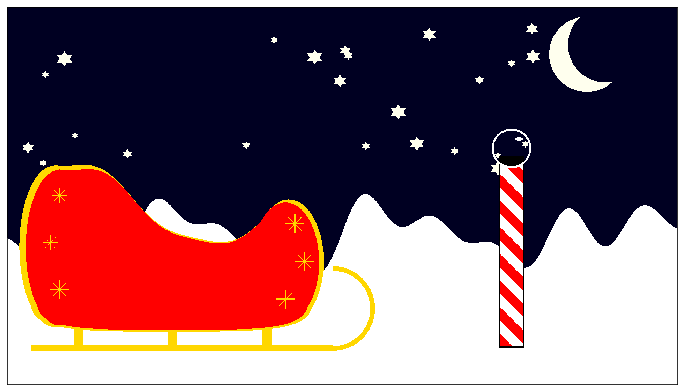

In [5]:
image = LayeredImage(background="000022")

image.add_layer(background, white)
image.add_layer(moon, moon_color)

xs = lerp(-1.8, 1.4)
ys = lerp(0, 1)
sizes = lerp(0.03, 0.08)
npr.seed(128)

for s, t, u in npr.rand(25, 3):
    star = Star(scale=sizes(u)) >> translate(xs(s), ys(t))
    image.add_layer(star, moon_color)

image.add_layer(northpole_outline, black)
image.add_layer(northpole, red)
image.add_layer(northpole1, white)

image.add_layer(globe, white)

image.add_layer(ski, gold)
image.add_layer(sleigh1, gold)
image.add_layer(posts, gold)
image.add_layer(sleigh, red)

image.add_layer(flake, gold)
image.add_layer(flake1, gold)
image.add_layer(flake2, gold)
image.add_layer(flake3, gold)
image.add_layer(flake4, gold)
image.add_layer(flake5, gold)